In [1]:
# Exemplo de caminho: pode ser uma pasta dentro do seu diretório home
# Lembre-se que o R pode adicionar subdiretórios específicos da versão/arquitetura
meu_caminho_biblioteca <- "~/R/library"

# Define a variável de ambiente R_LIBS_USER para a sessão atual
Sys.setenv(R_LIBS_USER = meu_caminho_biblioteca)

# Verifica o valor da variável de ambiente
Sys.getenv("R_LIBS_USER")

# Mostra todos os caminhos de biblioteca que o R está usando
# O seu novo caminho deve aparecer aqui, geralmente como o primeiro da lista.
.libPaths()

[1] "~/R/library"

[1] "/usr/local/lib/R/site-library" "/usr/local/lib/R/library"     
[3] "/home/vscode/R/library"

In [2]:

################################################################################
#               INSTALAÇÃO E CARREGAMENTO DE PACOTES NECESSÁRIOS               #
################################################################################

# Pacotes utilizados
pacotes <- c("tidyverse", #carregar outros pacotes do R
             "knitr", "kableExtra","IRdisplay") #formatação de tabelas


if(sum(as.numeric(!pacotes %in% installed.packages())) != 0){
  instalador <- pacotes[!pacotes %in% installed.packages()]
  for(i in 1:length(instalador)) {
    install.packages(instalador, dependencies = T, lib = meu_caminho_biblioteca)
    break()}
  sapply(pacotes, require, character = T, lib = meu_caminho_biblioteca) 
} else {
  sapply(pacotes, require, character = T, lib = meu_caminho_biblioteca) 
}

Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: knitr

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘knitr’”
Loading required package: kableExtra


Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows


Loading required package: IRdisplay

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical

tidyverse      knitr kableExtra  IRdisplay 
      TRUE      FALSE       TRUE      FALSE

In [16]:
# Para limpar a memória da sessão R removendo todos os objetos do ambiente global, 
# execute rm(list = ls(all.names = TRUE)). 
# Em seguida, rode gc() para forçar a coleta de lixo e liberar a memória fisicamente alocada.​
rm(list = ls(all.names = TRUE))
gc()
ls()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,1693268,90.5,3167052,169.2,2448674,130.8
Vcells,3546607,27.1,14367205,109.7,17943297,136.9


character(0)

In [17]:
load("Trabalho/bases-de-dados/acidentes/datatran2024.RData")
# df_acidentes_prf é o nome do data frame carregado
load("Trabalho/bases-de-dados/condicoes-de-pavimento/condicoes-de-pavimento.Rdata")
# df_pavimento_unificado é o nome do data frame carregado
load("Trabalho/bases-de-dados/definicao-de-pavimento/df_snv.RData")
# df_snv é o nome do data frame carregado
load("Trabalho/bases-de-dados/contagem-de-trafego/contagem-de-trafego.RData")
# df_trafego é o nome do data frame carregado
ls()

[1] "df_acidentes_prf"       "df_pavimento_unificado" "df_snv"                
[4] "df_trafego"

# G7

Fazer um código em R que analise a regressão linear entre a variável independente VMDA_TOTAL e a variável dependente ICM para as rodovias do Brasil.

================== PREPARAÇÃO DOS DADOS ==================

Dimensões do dataset para regressão:
Número de observações: 285 
Variáveis: 9 

Estatísticas Descritivas:

VMDA_TOTAL (Variável Independente):
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    237    2257    3449    4774    5192   41698 


ICM (Variável Dependente):
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.00   20.84   28.56   30.13   38.17   78.74 


================== MODELO DE REGRESSÃO LINEAR ==================


Call:
lm(formula = ICM ~ VMDA_TOTAL, data = df_regressao)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.506  -9.255  -1.147   7.760  49.116 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.847e+01  1.099e+00  25.906   <2e-16 ***
VMDA_TOTAL  3.465e-04  1.644e-04   2.108   0.0359 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.99 on 283 degrees of freedom
Multiple R-squared:  0.01546,	Adjusted R-squared:

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


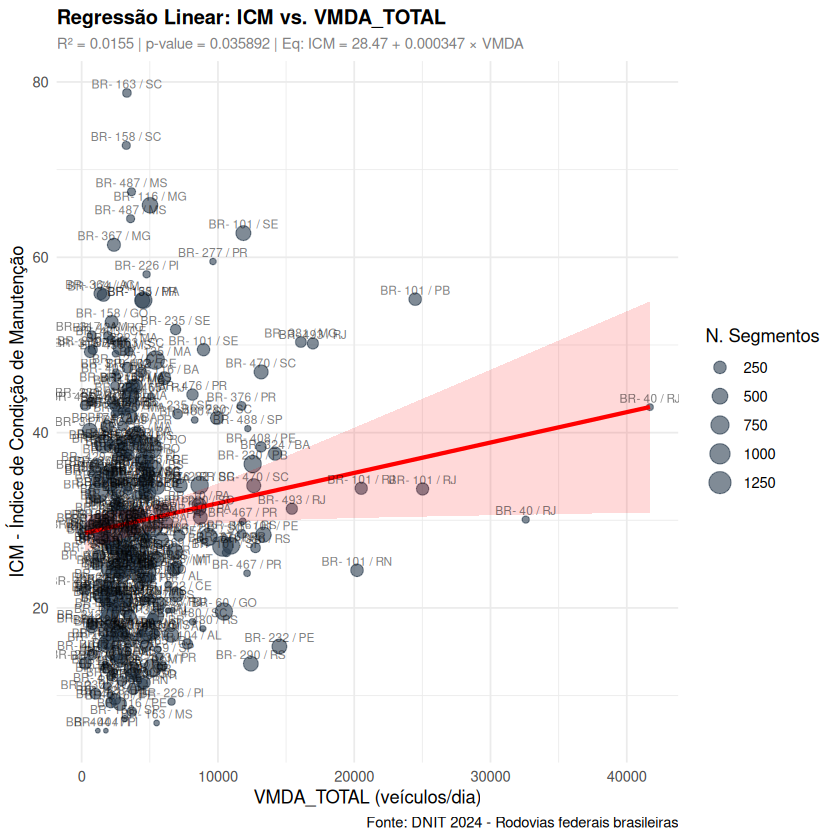

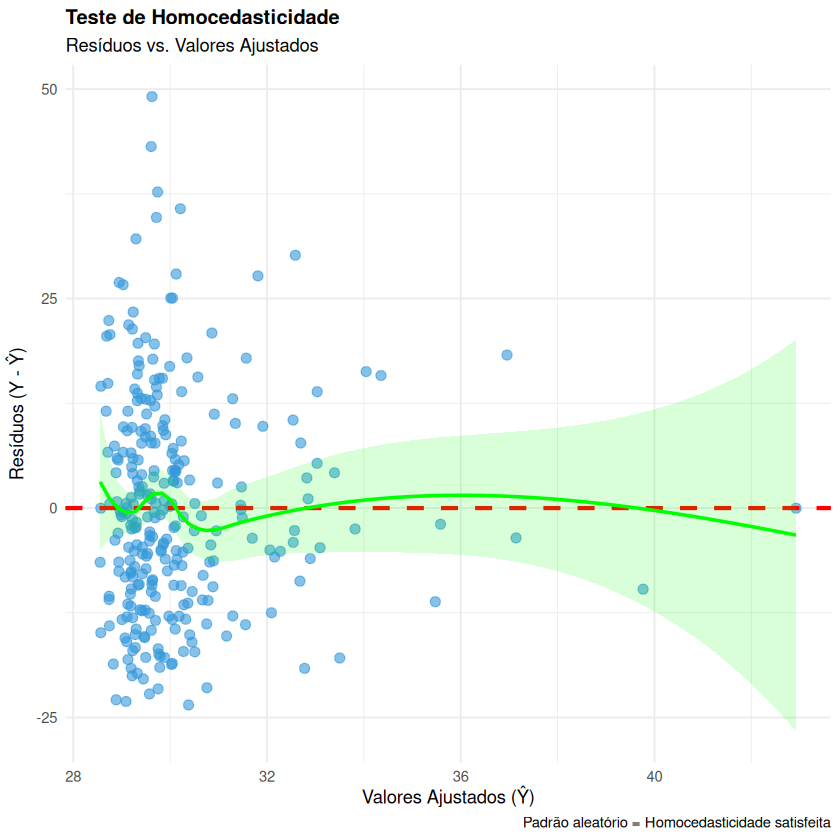

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


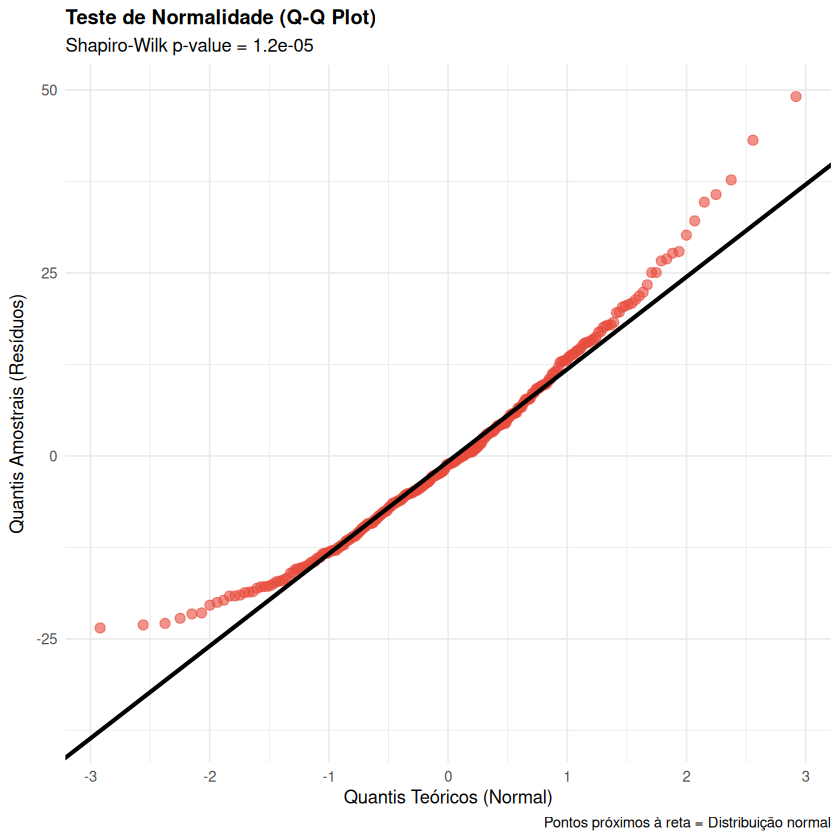

`geom_smooth()` using formula = 'y ~ x'


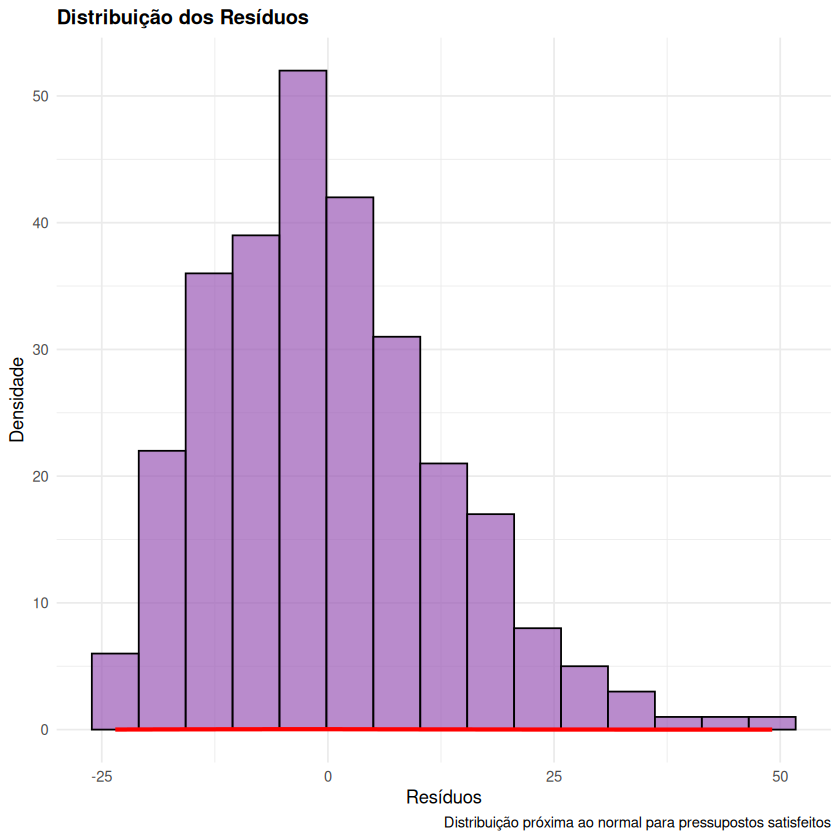



================== OBSERVAÇÕES INFLUENTES ==================

Top 10 Observações com MAIOR Influência (Distância de Cook):

# A tibble: 10 × 7
      BR uf      Ano VMDA_TOTAL   ICM Cook_Distance Residuos_Padronizados
   <int> <chr> <dbl>      <dbl> <dbl>         <dbl>                 <dbl>
 1   101 PB     2020     24476.  55.2        0.0743                 1.41 
 2    40 RJ     2021     32584.  30.1        0.0465                -0.747
 3   101 SE     2021     11868.  62.8        0.0319                 2.33 
 4   163 SC     2021      3322   78.7        0.0277                 3.79 
 5   158 SC     2021      3275.  72.8        0.0215                 3.33 
 6   493 RJ     2021     16966.  50.2        0.0214                 1.22 
 7   381 MG     2021     16084.  50.3        0.0198                 1.26 
 8   232 PE     2020     14510.  15.6        0.0184                -1.38 
 9   277 PR     2020      9637.  59.5        0.0168                 2.14 
10   101 RN     2021     20206.  24.3    

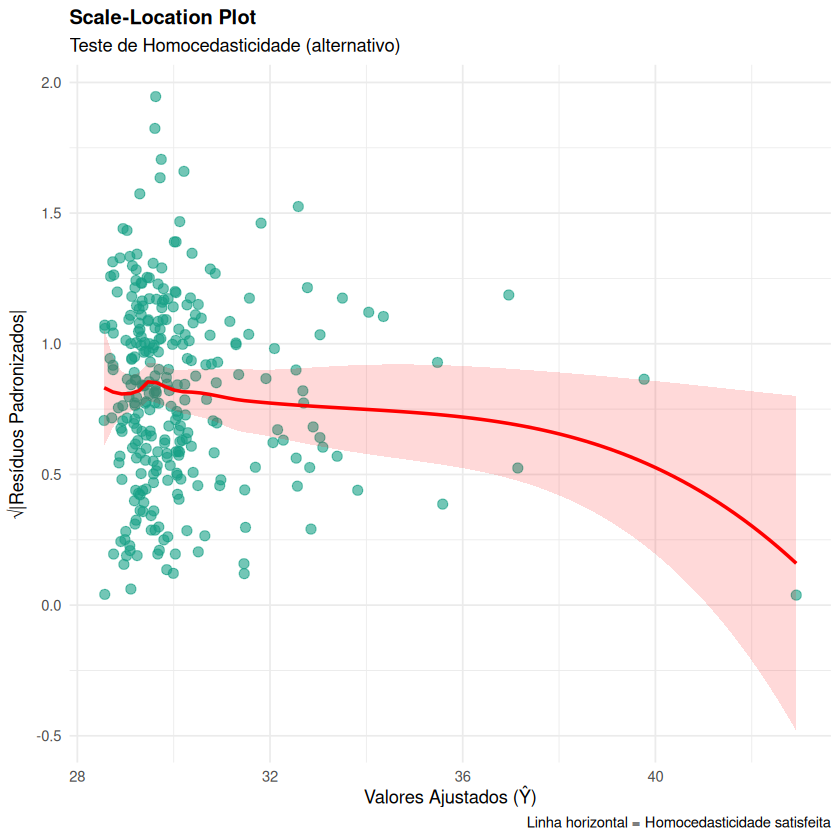

Exemplo de Previsão:
Se VMDA_TOTAL = 5.000 veículos/dia:
  ICM Predito = 30.21 
  Intervalo de Confiança (95%) = [ 28.69 ,  31.72 ]


================== CONCLUSÕES ==================

1. RELACIONAMENTO ENTRE VARIÁVEIS:
   → Relação POSITIVA: Maior volume de tráfego está associado a
     MAIOR degradação do pavimento (ICM mais alto = pior condição)

2. FORÇA DO RELACIONAMENTO:
   → R² = 0.0155 - MUITO FRACO (modelo explica <30% da variação)

3. SIGNIFICÂNCIA ESTATÍSTICA:
   → O coeficiente é SIGNIFICATIVO (p = 0.035892 )
   → Rejeitamos H0: há evidência de relação entre variáveis

4. QUALIDADE DO AJUSTE DO MODELO:
   → Pressupostos PARCIALMENTE NÃO SATISFEITOS
     * Resíduos não são normais

5. IMPLICAÇÕES PRÁTICAS:
   • O volume de tráfego (VMDA) influencia a condição do pavimento?
   • Outros fatores também afetam ICM (clima, manutenção, idade, etc.)
   • Modelo de regressão simples pode não capturar toda complexidade
   • Considerar regressão múltipla com variáveis adicionais


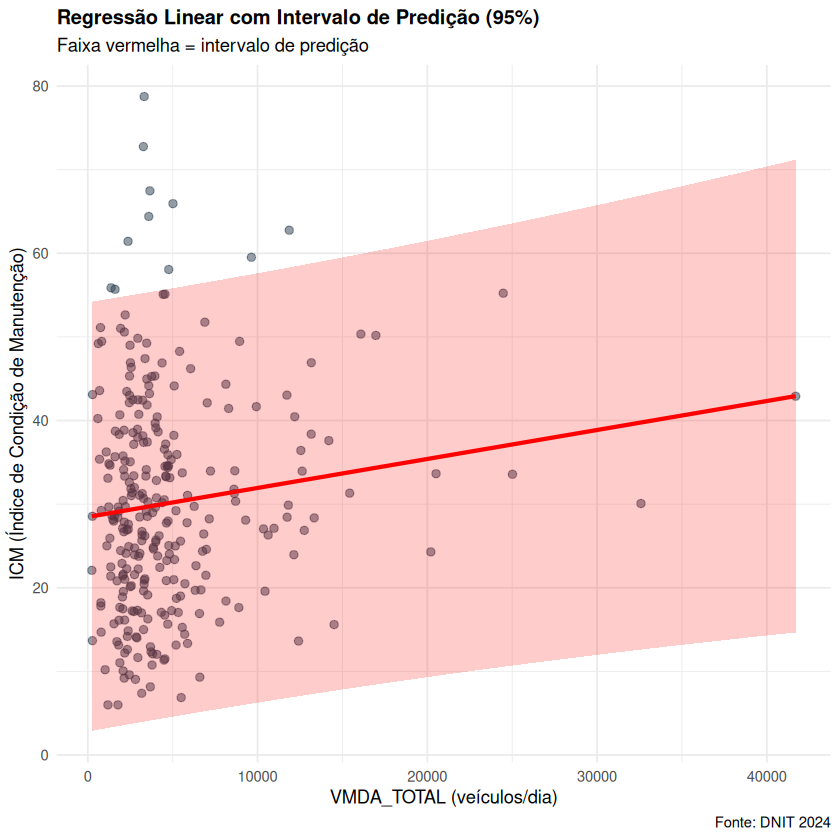

In [18]:
################################################################################
#     ANÁLISE DE REGRESSÃO LINEAR: VMDA_TOTAL vs. ICM                         #
#          Rodovias Federais Brasileiras                                       #
################################################################################

# As bibliotecas e dados já estão carregados das células anteriores
# library(tidyverse)
# library(ggplot2)
# df_trafego, df_pavimento_unificado, df_snv já foram carregados

################################################################################
# ETAPA 1: PREPARAR DADOS PARA REGRESSÃO                                      #
################################################################################

# Resumir dados de tráfego por rodovia, UF e ano
df_trafego_prep <- df_trafego %>%
    filter(!is.na(VMDA_TOTAL) & VMDA_TOTAL > 0) %>%
    group_by(CODIGO_BR, UF, Ano) %>%
    summarise(
        VMDA_TOTAL_Media = mean(VMDA_TOTAL, na.rm = TRUE),
        N_Trechos = n(),
        .groups = "drop"
    ) %>%
    rename(BR = CODIGO_BR, uf = UF)

# Resumir dados de pavimento por rodovia, UF e ano
df_pavimento_prep <- df_pavimento_unificado %>%
    mutate(
        BR = as.integer(gsub("BR-|BR ", "", Rodovia))
    ) %>%
    group_by(BR, UF, Ano) %>%
    summarise(
        ICM_Media = mean(ICM, na.rm = TRUE),
        ICC_Media = mean(ICC, na.rm = TRUE),
        ICP_Media = mean(ICP, na.rm = TRUE),
        N_Segmentos = n(),
        .groups = "drop"
    ) %>%
    rename(uf = UF)

# Unir datasets
df_regressao <- df_trafego_prep %>%
    inner_join(
        df_pavimento_prep,
        by = c("BR" = "BR", "uf" = "uf", "Ano" = "Ano")
    ) %>%
    filter(!is.na(ICM_Media) & !is.na(VMDA_TOTAL_Media)) %>%
    rename(
        VMDA_TOTAL = VMDA_TOTAL_Media,
        ICM = ICM_Media
    )

cat("================== PREPARAÇÃO DOS DADOS ==================\n\n")
cat("Dimensões do dataset para regressão:\n")
cat("Número de observações:", nrow(df_regressao), "\n")
cat("Variáveis:", ncol(df_regressao), "\n\n")

cat("Estatísticas Descritivas:\n\n")
cat("VMDA_TOTAL (Variável Independente):\n")
print(summary(df_regressao$VMDA_TOTAL))
cat("\n\nICM (Variável Dependente):\n")
print(summary(df_regressao$ICM))

################################################################################
# ETAPA 2: CONSTRUIR MODELO DE REGRESSÃO LINEAR                               #
################################################################################

cat("\n\n================== MODELO DE REGRESSÃO LINEAR ==================\n\n")

# Modelo: ICM ~ VMDA_TOTAL
modelo_regressao <- lm(ICM ~ VMDA_TOTAL, data = df_regressao)

# Resumo do modelo
summary_modelo <- summary(modelo_regressao)
print(summary_modelo)

################################################################################
# ETAPA 3: EXTRAIR INFORMAÇÕES PRINCIPAIS DO MODELO                           #
################################################################################

cat("\n\n================== RESULTADOS PRINCIPAIS ==================\n\n")

intercepto <- coef(modelo_regressao)[1]
coeficiente <- coef(modelo_regressao)[2]
r_quadrado <- summary_modelo$r.squared
r_quadrado_ajustado <- summary_modelo$adj.r.squared
p_value <- summary_modelo$coefficients[2, 4]
f_statistic <- summary_modelo$fstatistic[1]
f_p_value <- pf(f_statistic, 
                                summary_modelo$fstatistic[2], 
                                summary_modelo$fstatistic[3], 
                                lower.tail = FALSE)

cat("Equação da Reta:\n")
cat("ICM = ", round(intercepto, 4), " + ", round(coeficiente, 6), " × VMDA_TOTAL\n\n")

cat("Interpretação do Coeficiente de Regressão:\n")
if(coeficiente > 0) {
    cat("• Para cada aumento de 1.000 veículos/dia no VMDA_TOTAL,\n")
    cat("  o ICM aumenta em ", round(coeficiente * 1000, 4), " unidades em média\n")
    cat("• Relação POSITIVA: Maior tráfego → Maior degradação do pavimento\n")
} else {
    cat("• Para cada aumento de 1.000 veículos/dia no VMDA_TOTAL,\n")
    cat("  o ICM diminui em ", round(abs(coeficiente) * 1000, 4), " unidades em média\n")
    cat("• Relação NEGATIVA: Maior tráfego → Melhor condição de pavimento(?)\n")
}

cat("\n\nQualidade do Ajuste:\n")
cat("R² (Coeficiente de Determinação):", round(r_quadrado, 4), "\n")
cat("  → O modelo explica", round(r_quadrado * 100, 2), "% da variação no ICM\n\n")
cat("R² Ajustado:", round(r_quadrado_ajustado, 4), "\n")
cat("  → Considerando número de variáveis (penalização de complexidade)\n\n")

cat("Significância Estatística do Coeficiente:\n")
cat("p-value (VMDA_TOTAL):", round(p_value, 6), "\n")
if(p_value < 0.05) {
    cat("  → SIGNIFICATIVO (p < 0.05): A relação é estatisticamente significativa\n")
} else {
    cat("  → NÃO SIGNIFICATIVO (p ≥ 0.05): A relação pode ser por acaso\n")
}

cat("\n\nTeste F Global:\n")
cat("F-statistic:", round(f_statistic, 4), "\n")
cat("p-value:", round(f_p_value, 6), "\n")
if(f_p_value < 0.05) {
    cat("  → Modelo SIGNIFICATIVO (p < 0.05): O modelo como um todo é válido\n")
} else {
    cat("  → Modelo NÃO SIGNIFICATIVO (p ≥ 0.05)\n")
}

################################################################################
# ETAPA 4: DIAGNÓSTICO DO MODELO (PRESSUPOSTOS)                               #
################################################################################

cat("\n\n================== DIAGNÓSTICO DO MODELO ==================\n\n")

# Extrair resíduos e valores ajustados
residuos <- residuals(modelo_regressao)
valores_ajustados <- fitted(modelo_regressao)

# Teste de normalidade dos resíduos (Shapiro-Wilk)
teste_normalidade <- shapiro.test(residuos)
cat("Teste de Normalidade dos Resíduos (Shapiro-Wilk):\n")
cat("p-value:", round(teste_normalidade$p.value, 6), "\n")
if(teste_normalidade$p.value > 0.05) {
    cat("  → Resíduos são normalmente distribuídos (p > 0.05) ✓\n")
} else {
    cat("  → Resíduos NÃO são normalmente distribuídos (p < 0.05) ✗\n")
}

# Teste de homocedasticidade (Breusch-Pagan simplificado)
# Correlação entre resíduos absolutos e valores ajustados
cor_hetero <- cor(abs(residuos), valores_ajustados)
cat("\nTeste de Homocedasticidade (correlação de resíduos com ajustados):\n")
cat("Correlação:", round(cor_hetero, 4), "\n")
if(abs(cor_hetero) < 0.3) {
    cat("  → Homocedasticidade assumida (variância constante) ✓\n")
} else {
    cat("  → Possível heterocedasticidade (variância não-constante) ✗\n")
}

################################################################################
# ETAPA 5: VISUALIZAÇÕES                                                      #
################################################################################

cat("\n\n================== GERANDO GRÁFICOS ==================\n\n")

# Gráfico 1: Scatter plot com reta de regressão
plot1 <- ggplot(df_regressao, aes(x = VMDA_TOTAL, y = ICM)) +
    geom_point(aes(size = N_Segmentos), alpha = 0.6, color = "#2c3e50") +
    geom_smooth(method = "lm", se = TRUE, color = "red", fill = "red", alpha = 0.15, size = 1.2) +
    geom_text(
        aes(label = paste("BR-", BR, "/", uf)),
        size = 2.5, alpha = 0.5, vjust = -0.5
    ) +
    scale_size_continuous(name = "N. Segmentos", range = c(1, 6)) +
    labs(
        title = "Regressão Linear: ICM vs. VMDA_TOTAL",
        subtitle = paste(
            "R² =", round(r_quadrado, 4), 
            "| p-value =", round(p_value, 6),
            "| Eq: ICM =", round(intercepto, 2), "+", round(coeficiente, 6), "× VMDA"
        ),
        x = "VMDA_TOTAL (veículos/dia)",
        y = "ICM - Índice de Condição de Manutenção",
        caption = "Fonte: DNIT 2024 - Rodovias federais brasileiras"
    ) +
    theme_minimal() +
    theme(
        plot.title = element_text(face = "bold", size = 12),
        plot.subtitle = element_text(size = 9, color = "gray50"),
        legend.position = "right"
    )

print(plot1)

# Gráfico 2: Resíduos vs. Valores Ajustados (Homocedasticidade)
df_diagnostico <- tibble(
    Ajustados = valores_ajustados,
    Residuos = residuos
)

plot2 <- ggplot(df_diagnostico, aes(x = Ajustados, y = Residuos)) +
    geom_point(alpha = 0.6, color = "#3498db", size = 2.5) +
    geom_hline(yintercept = 0, color = "red", linetype = "dashed", size = 1.2) +
    geom_smooth(method = "loess", se = TRUE, color = "green", fill = "green", alpha = 0.15) +
    labs(
        title = "Teste de Homocedasticidade",
        subtitle = "Resíduos vs. Valores Ajustados",
        x = "Valores Ajustados (Ŷ)",
        y = "Resíduos (Y - Ŷ)",
        caption = "Padrão aleatório = Homocedasticidade satisfeita"
    ) +
    theme_minimal() +
    theme(plot.title = element_text(face = "bold", size = 12))

print(plot2)

# Gráfico 3: Q-Q Plot (Normalidade dos Resíduos)
plot3 <- ggplot(df_diagnostico, aes(sample = Residuos)) +
    stat_qq(color = "#e74c3c", size = 2.5, alpha = 0.6) +
    stat_qq_line(color = "black", size = 1.2) +
    labs(
        title = "Teste de Normalidade (Q-Q Plot)",
        subtitle = paste("Shapiro-Wilk p-value =", round(teste_normalidade$p.value, 6)),
        x = "Quantis Teóricos (Normal)",
        y = "Quantis Amostrais (Resíduos)",
        caption = "Pontos próximos à reta = Distribuição normal"
    ) +
    theme_minimal() +
    theme(plot.title = element_text(face = "bold", size = 12))

print(plot3)

# Gráfico 4: Histograma dos Resíduos
plot4 <- ggplot(df_diagnostico, aes(x = Residuos)) +
    geom_histogram(bins = 15, fill = "#9b59b6", alpha = 0.7, color = "black") +
    geom_density(aes(y = ..density..), color = "red", size = 1.2, fill = "red", alpha = 0.15) +
    labs(
        title = "Distribuição dos Resíduos",
        x = "Resíduos",
        y = "Densidade",
        caption = "Distribuição próxima ao normal para pressupostos satisfeitos"
    ) +
    theme_minimal() +
    theme(plot.title = element_text(face = "bold", size = 12))

print(plot4)

# Gráfico 5: Scale-Location Plot (Homocedasticidade)
df_diagnostico <- df_diagnostico %>%
    mutate(
        Residuos_Padronizados = Residuos / sd(Residuos),
        Raiz_Residuos_Abs = sqrt(abs(Residuos_Padronizados))
    )

plot5 <- ggplot(df_diagnostico, aes(x = Ajustados, y = Raiz_Residuos_Abs)) +
    geom_point(alpha = 0.6, color = "#16a085", size = 2.5) +
    geom_smooth(method = "loess", se = TRUE, color = "red", fill = "red", alpha = 0.15) +
    labs(
        title = "Scale-Location Plot",
        subtitle = "Teste de Homocedasticidade (alternativo)",
        x = "Valores Ajustados (Ŷ)",
        y = "√|Resíduos Padronizados|",
        caption = "Linha horizontal = Homocedasticidade satisfeita"
    ) +
    theme_minimal() +
    theme(plot.title = element_text(face = "bold", size = 12))

print(plot5)

################################################################################
# ETAPA 6: ANÁLISE DE RESÍDUOS EXTREMOS                                       #
################################################################################

cat("\n\n================== OBSERVAÇÕES INFLUENTES ==================\n\n")

# Distância de Cook (valores de influência)
cook_distance <- cooks.distance(modelo_regressao)
df_regressao_diag <- df_regressao %>%
    mutate(
        Cook_Distance = cook_distance,
        Residuos_Padronizados = residuos / sd(residuos)
    )

# Top 5 observações com maior influência
top_influential <- df_regressao_diag %>%
    arrange(desc(Cook_Distance)) %>%
    select(BR, uf, Ano, VMDA_TOTAL, ICM, Cook_Distance, Residuos_Padronizados) %>%
    head(10)

cat("Top 10 Observações com MAIOR Influência (Distância de Cook):\n\n")
print(top_influential)

################################################################################
# ETAPA 7: PREVISÕES USANDO O MODELO                                          #
################################################################################

cat("\n\n================== PREVISÕES DO MODELO ==================\n\n")

# Criar sequência de VMDA_TOTAL para previsão
vmda_novo <- data.frame(
    VMDA_TOTAL = seq(min(df_regressao$VMDA_TOTAL), 
                                     max(df_regressao$VMDA_TOTAL), 
                                     length.out = 100)
)

# Prever ICM com intervalo de confiança
predicoes <- predict(modelo_regressao, 
                                         newdata = vmda_novo, 
                                         se.fit = TRUE, 
                                         interval = "prediction", 
                                         level = 0.95)

vmda_novo$ICM_Pred <- predicoes$fit[, 1]
vmda_novo$ICM_LI <- predicoes$fit[, 2]
vmda_novo$ICM_LS <- predicoes$fit[, 3]

# Gráfico 6: Previsões com intervalo
plot6 <- ggplot() +
    geom_point(data = df_regressao, aes(x = VMDA_TOTAL, y = ICM), 
                         alpha = 0.5, color = "#2c3e50", size = 2) +
    geom_line(data = vmda_novo, aes(x = VMDA_TOTAL, y = ICM_Pred), 
                        color = "red", size = 1.2) +
    geom_ribbon(data = vmda_novo, 
                            aes(x = VMDA_TOTAL, ymin = ICM_LI, ymax = ICM_LS),
                            fill = "red", alpha = 0.2) +
    labs(
        title = "Regressão Linear com Intervalo de Predição (95%)",
        x = "VMDA_TOTAL (veículos/dia)",
        y = "ICM (Índice de Condição de Manutenção)",
        subtitle = "Faixa vermelha = intervalo de predição",
        caption = "Fonte: DNIT 2024"
    ) +
    theme_minimal() +
    theme(plot.title = element_text(face = "bold", size = 12))

print(plot6)

# Exemplo de previsão pontual
cat("Exemplo de Previsão:\n")
cat("Se VMDA_TOTAL = 5.000 veículos/dia:\n")
vmda_exemplo <- data.frame(VMDA_TOTAL = 5000)
pred_exemplo <- predict(modelo_regressao, 
                                                newdata = vmda_exemplo, 
                                                se.fit = TRUE, 
                                                interval = "confidence",
                                                level = 0.95)
cat("  ICM Predito =", round(pred_exemplo$fit[1], 2), "\n")
cat("  Intervalo de Confiança (95%) = [", 
        round(pred_exemplo$fit[2], 2), ", ",
        round(pred_exemplo$fit[3], 2), "]\n")

################################################################################
# ETAPA 8: SUMÁRIO FINAL E CONCLUSÕES                                         #
################################################################################

cat("\n\n================== CONCLUSÕES ==================\n\n")

cat("1. RELACIONAMENTO ENTRE VARIÁVEIS:\n")
if(coeficiente > 0) {
    cat("   → Relação POSITIVA: Maior volume de tráfego está associado a\n")
    cat("     MAIOR degradação do pavimento (ICM mais alto = pior condição)\n")
} else {
    cat("   → Relação NEGATIVA: Maior volume de tráfego está associado a\n")
    cat("     MENOR degradação do pavimento (possivelmente maior manutenção)\n")
}

cat("\n2. FORÇA DO RELACIONAMENTO:\n")
if(r_quadrado > 0.7) {
    cat("   → R² =", round(r_quadrado, 4), "- FORTE (modelo explica >70% da variação)\n")
} else if(r_quadrado > 0.5) {
    cat("   → R² =", round(r_quadrado, 4), "- MODERADO (modelo explica 50-70% da variação)\n")
} else if(r_quadrado > 0.3) {
    cat("   → R² =", round(r_quadrado, 4), "- FRACO (modelo explica 30-50% da variação)\n")
} else {
    cat("   → R² =", round(r_quadrado, 4), "- MUITO FRACO (modelo explica <30% da variação)\n")
}

cat("\n3. SIGNIFICÂNCIA ESTATÍSTICA:\n")
if(p_value < 0.05) {
    cat("   → O coeficiente é SIGNIFICATIVO (p =", round(p_value, 6), ")\n")
    cat("   → Rejeitamos H0: há evidência de relação entre variáveis\n")
} else {
    cat("   → O coeficiente NÃO é SIGNIFICATIVO (p =", round(p_value, 6), ")\n")
    cat("   → Não rejeitamos H0: não há evidência clara de relação\n")
}

cat("\n4. QUALIDADE DO AJUSTE DO MODELO:\n")
if(teste_normalidade$p.value > 0.05 & abs(cor_hetero) < 0.3) {
    cat("   → Pressupostos SATISFEITOS: modelo é válido para inferência\n")
} else {
    cat("   → Pressupostos PARCIALMENTE NÃO SATISFEITOS\n")
    if(teste_normalidade$p.value < 0.05) {
        cat("     * Resíduos não são normais\n")
    }
    if(abs(cor_hetero) >= 0.3) {
        cat("     * Possível heterocedasticidade (variância não-constante)\n")
    }
}

cat("\n5. IMPLICAÇÕES PRÁTICAS:\n")
cat("   • O volume de tráfego (VMDA) influencia a condição do pavimento?\n")
cat("   • Outros fatores também afetam ICM (clima, manutenção, idade, etc.)\n")
cat("   • Modelo de regressão simples pode não capturar toda complexidade\n")
cat("   • Considerar regressão múltipla com variáveis adicionais\n")

In [3]:
library(tidyverse)
library(ggplot2)

Resumo das Condições de Pavimento (ICM) por Rodovia/UF/Ano:
# A tibble: 5 × 5
     BR uf      Ano Media_ICM N_Segmentos
  <int> <chr> <dbl>     <dbl>       <int>
1    10 MA     2020      33.7         345
2    10 MA     2021      45.3         347
3    10 PA     2020      31.8         355
4    10 PA     2021      30.3         355
5    10 TO     2020      24.5         343

Resumo do Volume de Tráfego (VMDA) por Rodovia/UF/Ano:
# A tibble: 5 × 4
     BR uf      Ano VMDA_Media
  <int> <chr> <int>      <dbl>
1     1 BA     2021      2041.
2     1 PE     2021      6631 
3     2 RN     2021      8993 
4     3 RN     2021      1244.
5     4 PB     2021     14789 

          RESULTADO DA REGRESSÃO LINEAR (ICM ~ log(VMDA))         



Call:
lm(formula = Media_ICM ~ log(VMDA_Media), data = df_analise)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.939  -9.598  -1.266   7.908  48.699 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)  
(Intercept)      17.6504     8.1460   2.167   0.0311 *
log(VMDA_Media)   1.5284     0.9932   1.539   0.1250  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.04 on 283 degrees of freedom
Multiple R-squared:  0.008298,	Adjusted R-squared:  0.004794 
F-statistic: 2.368 on 1 and 283 DF,  p-value: 0.125



Coeficiente de Correlação de Pearson (ICM vs. VMDA_TOTAL): 0.1243 


`geom_smooth()` using formula = 'y ~ x'


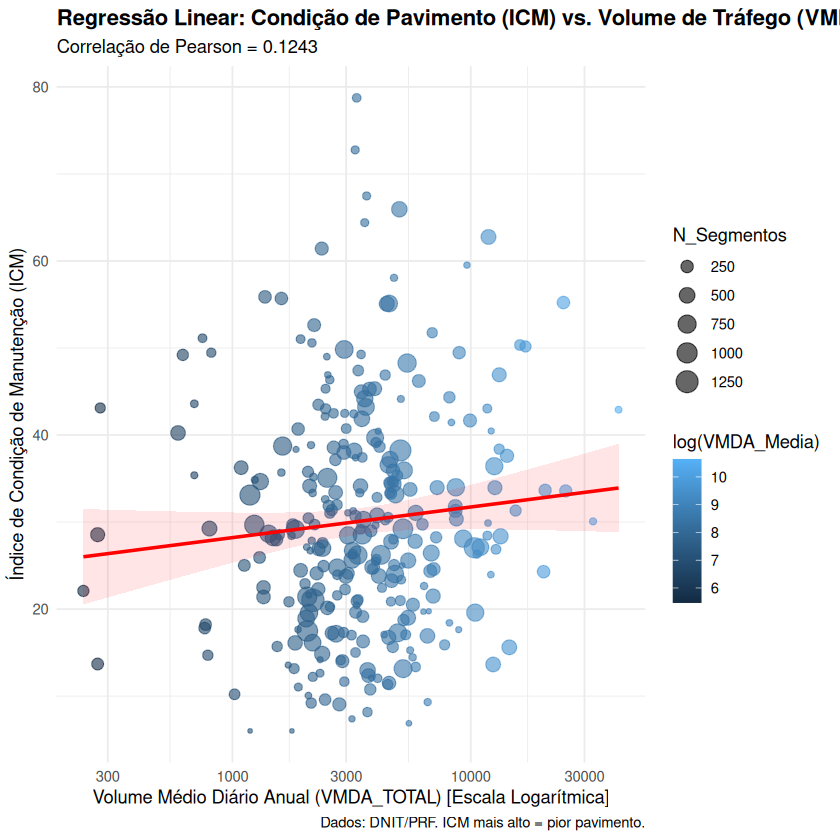

In [4]:
# Carregar bibliotecas necessárias
library(tidyverse)
library(ggplot2)

# Assumindo que as bases de dados df_pavimento_unificado e df_trafego
# já foram carregadas na sessão, conforme o ambiente de trabalho:
load("Trabalho/bases-de-dados/condicoes-de-pavimento/condicoes-de-pavimento.Rdata") 
load("Trabalho/bases-de-dados/contagem-de-trafego/contagem-de-trafego.RData")

################################################################################
# ETAPA 1: PREPARAÇÃO E AGREGAÇÃO DOS DADOS DE PAVIMENTO (ICM)
################################################################################

# 1. Agrega as condições de pavimento (ICM) por Rodovia, UF e Ano.
# A agregação é necessária porque 'df_pavimento_unificado' contém segmentos.
df_icm_resumo <- df_pavimento_unificado %>%
  # Converte 'Rodovia' de BR-XXX para número inteiro para o join
  mutate(Rodovia_Num = as.integer(gsub("BR-|BR ", "", Rodovia))) %>%
  group_by(Rodovia_Num, UF, Ano) %>%
  summarise(
    Media_ICM = mean(ICM, na.rm = TRUE), # Variável Dependente (Y) [3, 4]
    N_Segmentos = n(),
    .groups = "drop"
  ) %>%
  rename(BR = Rodovia_Num, uf = UF)

cat("Resumo das Condições de Pavimento (ICM) por Rodovia/UF/Ano:\n")
print(head(df_icm_resumo, 5))

################################################################################
# ETAPA 2: PREPARAÇÃO E AGREGAÇÃO DOS DADOS DE TRÁFEGO (VMDA_TOTAL)
################################################################################

# 2. Agrega o volume de tráfego (VMDA_TOTAL) por Rodovia, UF e Ano.
df_trafego_resumo <- df_trafego %>%
  # Filtra valores ausentes/zero para VMDA_TOTAL, conforme recomendado [5, 6]
  filter(!is.na(VMDA_TOTAL) & VMDA_TOTAL > 0) %>%
  group_by(CODIGO_BR, UF, Ano) %>%
  summarise(
    VMDA_Media = mean(VMDA_TOTAL, na.rm = TRUE), # Variável Independente (X) [6, 7]
    .groups = "drop"
  ) %>%
  rename(BR = CODIGO_BR, uf = UF)

cat("\nResumo do Volume de Tráfego (VMDA) por Rodovia/UF/Ano:\n")
print(head(df_trafego_resumo, 5))

################################################################################
# ETAPA 3: UNIÃO DOS DATASETS E REGRESSÃO LINEAR
################################################################################

# 3. Combina os datasets por BR, UF e Ano [8]
df_analise <- df_icm_resumo %>%
  inner_join(
    df_trafego_resumo,
    by = c("BR" = "BR", "uf" = "uf", "Ano" = "Ano")
  ) %>%
  # Garante que não há NAs na variável dependente ou independente [8]
  filter(!is.na(Media_ICM) & !is.na(VMDA_Media))

# 4. Ajuste do modelo de regressão linear: ICM ~ VMDA_TOTAL
# ICM (Y) = f(VMDA_TOTAL) (X)
# É comum usar log(X) em tráfego devido à alta dispersão [9].
# Usaremos 'Media_ICM ~ log(VMDA_Media)' para um modelo mais robusto.
modelo_regressao <- lm(Media_ICM ~ log(VMDA_Media), data = df_analise)

# 5. Apresentação do sumário do modelo [10, 11]
cat("\n======================================================\n")
cat("          RESULTADO DA REGRESSÃO LINEAR (ICM ~ log(VMDA))         \n")
cat("======================================================\n")
summary(modelo_regressao)

# 6. Extração e apresentação da correlação de Pearson [12, 13]
correlacao_icm_vmda <- cor(df_analise$Media_ICM, df_analise$VMDA_Media, use = "complete.obs")

cat(paste("\nCoeficiente de Correlação de Pearson (ICM vs. VMDA_TOTAL):", 
          round(correlacao_icm_vmda, 4), "\n"))

################################################################################
# ETAPA 4: VISUALIZAÇÃO COM GGPLOT2
################################################################################

# 7. Criação do gráfico de dispersão com a reta de regressão [14, 15]
plot_regressao <- ggplot(df_analise, aes(x = VMDA_Media, y = Media_ICM)) +
  geom_point(aes(color = log(VMDA_Media), size = N_Segmentos), alpha = 0.6) +
  # Usa a escala logarítmica no eixo X para gerenciar a alta dispersão do VMDA [15]
  scale_x_continuous(trans = 'log10') +
  
  # Adiciona a linha de regressão linear
  geom_smooth(method = "lm", se = TRUE, color = "red", fill = "red", alpha = 0.1) +
  
  labs(
    title = "Regressão Linear: Condição de Pavimento (ICM) vs. Volume de Tráfego (VMDA)",
    subtitle = paste("Correlação de Pearson =", round(correlacao_icm_vmda, 4)),
    x = "Volume Médio Diário Anual (VMDA_TOTAL) [Escala Logarítmica]",
    y = "Índice de Condição de Manutenção (ICM)",
    caption = "Dados: DNIT/PRF. ICM mais alto = pior pavimento."
  ) +
  theme_minimal() +
  theme(plot.title = element_text(face = "bold"))

# Imprimir o gráfico (necessita de ambiente gráfico)
print(plot_regressao)